# Loading And Graphing Monthly Summaries

In [10]:
# Make the json_helper module available to this notebook.

import sys
import os

# Add the NOAADailySummaries directory to Python path
json_helper_path = os.path.abspath('../NOAADailySummaries')
if json_helper_path not in sys.path:
    sys.path.insert(0, json_helper_path)

# Now import all required modules
import json_helper
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import json
import datetime
  





In [27]:
# Using the json_helper module, load all of the json files acquired in part one of this lab into a Pandas DataFrame.
def read_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)["results"]
    return data

def read_all_json_files(JSON_ROOT):
    all_records = []
    for item_name in os.listdir(JSON_ROOT):
        item_path = os.path.join(JSON_ROOT, item_name)
        if os.path.isfile(item_path) and item_name.endswith(".json"):
            with open(item_path, 'r', encoding='utf-8') as f:
                subdata = read_json(item_path)
                for obj in subdata:
                    obj["source_file"] = item_name  # Track the source file
                    all_records.append(obj)

    return pd.DataFrame(all_records)

df = read_all_json_files('./data/monthly_summaries')

In [28]:
# Display a summary of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3259 non-null   object 
 1   datatype     3259 non-null   object 
 2   station      3259 non-null   object 
 3   attributes   3259 non-null   object 
 4   value        3259 non-null   float64
 5   source_file  3259 non-null   object 
dtypes: float64(1), object(5)
memory usage: 152.9+ KB


In [31]:
# How many stations are there?
df


,date,datatype,station,attributes,value,source_file
0,1958-01-01T00:00:00,TAVG,GHCND:USC00075852,",0",0.26,FIPS10003_avg_1958_to_1967.json
1,1958-01-01T00:00:00,TAVG,GHCND:USC00076410,",0",-0.57,FIPS10003_avg_1958_to_1967.json
2,1958-01-01T00:00:00,TAVG,GHCND:USC00079605,",0",-0.58,FIPS10003_avg_1958_to_1967.json
3,1958-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",-0.71,FIPS10003_avg_1958_to_1967.json
4,1958-02-01T00:00:00,TAVG,GHCND:USC00075852,",0",-1.69,FIPS10003_avg_1958_to_1967.json
...,...,...,...,...,...,...
3254,1997-11-01T00:00:00,TAVG,GHCND:USC00079605,",0",6.77,FIPS10003_avg_1988_to_1997.json
3255,1997-11-01T00:00:00,TAVG,GHCND:USW00013781,",0",6.44,FIPS10003_avg_1988_to_1997.json
3256,1997-12-01T00:00:00,TAVG,GHCND:USC00076410,"1,0",3.57,FIPS10003_avg_1988_to_1997.json
3257,1997-12-01T00:00:00,TAVG,GHCND:USC00079605,",0",3.39,FIPS10003_avg_1988_to_1997.json


In [ ]:
# How many rows are associated with each DataFrame?
station_counts = df['source_file'].value_counts()
print("Number of rows associated with each file:")
print(station_counts)
 

Number of rows associated with each file:
source_file
FIPS10003_avg_1948_to_1957.json    497
FIPS10003_avg_1968_to_1977.json    475
FIPS10003_avg_1978_to_1987.json    462
FIPS10003_avg_1958_to_1967.json    451
FIPS10003_avg_1988_to_1997.json    367
FIPS10003_avg_1998_to_2007.json    362
FIPS10003_avg_1938_to_1947.json    333
FIPS10003_avg_2008_to_2017.json    290
FIPS10003_avg_2018_to_2018.json     22
Name: count, dtype: int64


# Narrow our analysis to station id: GHCND:USW00013781

https://www.ncdc.noaa.gov/cdo-web/api/v2/stations/GHCND:USW00013781
{
    "elevation": 24.1,
    "mindate": "1948-01-01",
    "maxdate": "2019-12-05",
    "latitude": 39.6744,
    "name": "WILMINGTON NEW CASTLE CO AIRPORT, DE US",
    "datacoverage": 1,
    "id": "GHCND:USW00013781",
    "elevationUnit": "METERS",
    "longitude": -75.60567
}

In [35]:
# Create a DataFrame called "df_wilm_readings". 
# This DataFrame should only contain records associated with station id 'GHCND:USW00013781'.
df_wilm_readings=df[df["station"]=="GHCND:USW00013781"]

In [36]:
df_wilm_readings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 860 entries, 3 to 3258
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         860 non-null    object 
 1   datatype     860 non-null    object 
 2   station      860 non-null    object 
 3   attributes   860 non-null    object 
 4   value        860 non-null    float64
 5   source_file  860 non-null    object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [37]:
# Display a summary of the df_wilm_readings DataFrame.
df_wilm_readings

,date,datatype,station,attributes,value,source_file
3,1958-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",-0.71,FIPS10003_avg_1958_to_1967.json
7,1958-02-01T00:00:00,TAVG,GHCND:USW00013781,",0",-2.64,FIPS10003_avg_1958_to_1967.json
11,1958-03-01T00:00:00,TAVG,GHCND:USW00013781,",0",3.84,FIPS10003_avg_1958_to_1967.json
15,1958-04-01T00:00:00,TAVG,GHCND:USW00013781,",0",11.88,FIPS10003_avg_1958_to_1967.json
19,1958-05-01T00:00:00,TAVG,GHCND:USW00013781,",0",15.95,FIPS10003_avg_1958_to_1967.json
...,...,...,...,...,...,...
3246,1997-08-01T00:00:00,TAVG,GHCND:USW00013781,",0",22.63,FIPS10003_avg_1988_to_1997.json
3249,1997-09-01T00:00:00,TAVG,GHCND:USW00013781,",0",18.58,FIPS10003_avg_1988_to_1997.json
3252,1997-10-01T00:00:00,TAVG,GHCND:USW00013781,",0",13.13,FIPS10003_avg_1988_to_1997.json
3255,1997-11-01T00:00:00,TAVG,GHCND:USW00013781,",0",6.44,FIPS10003_avg_1988_to_1997.json


In [38]:
# Create a DataFrame called jan_readings.
# This DataFrame should filter the contents of df_wilm_readings in such a way that it only keeps records 
# which are associated with the month of January.
# Make sure that rows are sorted by date.
jan_readings=df_wilm_readings[pd.to_datetime(df_wilm_readings['date']).dt.month == 1]
jan_readings

,date,datatype,station,attributes,value,source_file
3,1958-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",-0.71,FIPS10003_avg_1958_to_1967.json
50,1959-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",-0.61,FIPS10003_avg_1958_to_1967.json
96,1960-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",1.70,FIPS10003_avg_1958_to_1967.json
144,1961-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",-3.56,FIPS10003_avg_1958_to_1967.json
189,1962-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",-0.47,FIPS10003_avg_1958_to_1967.json
...,...,...,...,...,...,...
3082,1993-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",3.08,FIPS10003_avg_1988_to_1997.json
3118,1994-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",-3.19,FIPS10003_avg_1988_to_1997.json
3154,1995-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",2.55,FIPS10003_avg_1988_to_1997.json
3190,1996-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",-1.17,FIPS10003_avg_1988_to_1997.json


In [39]:
# What is the shape of jan_readings?
jan_readings.shape

(71, 6)

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Max Temperatues Jan 2018')]

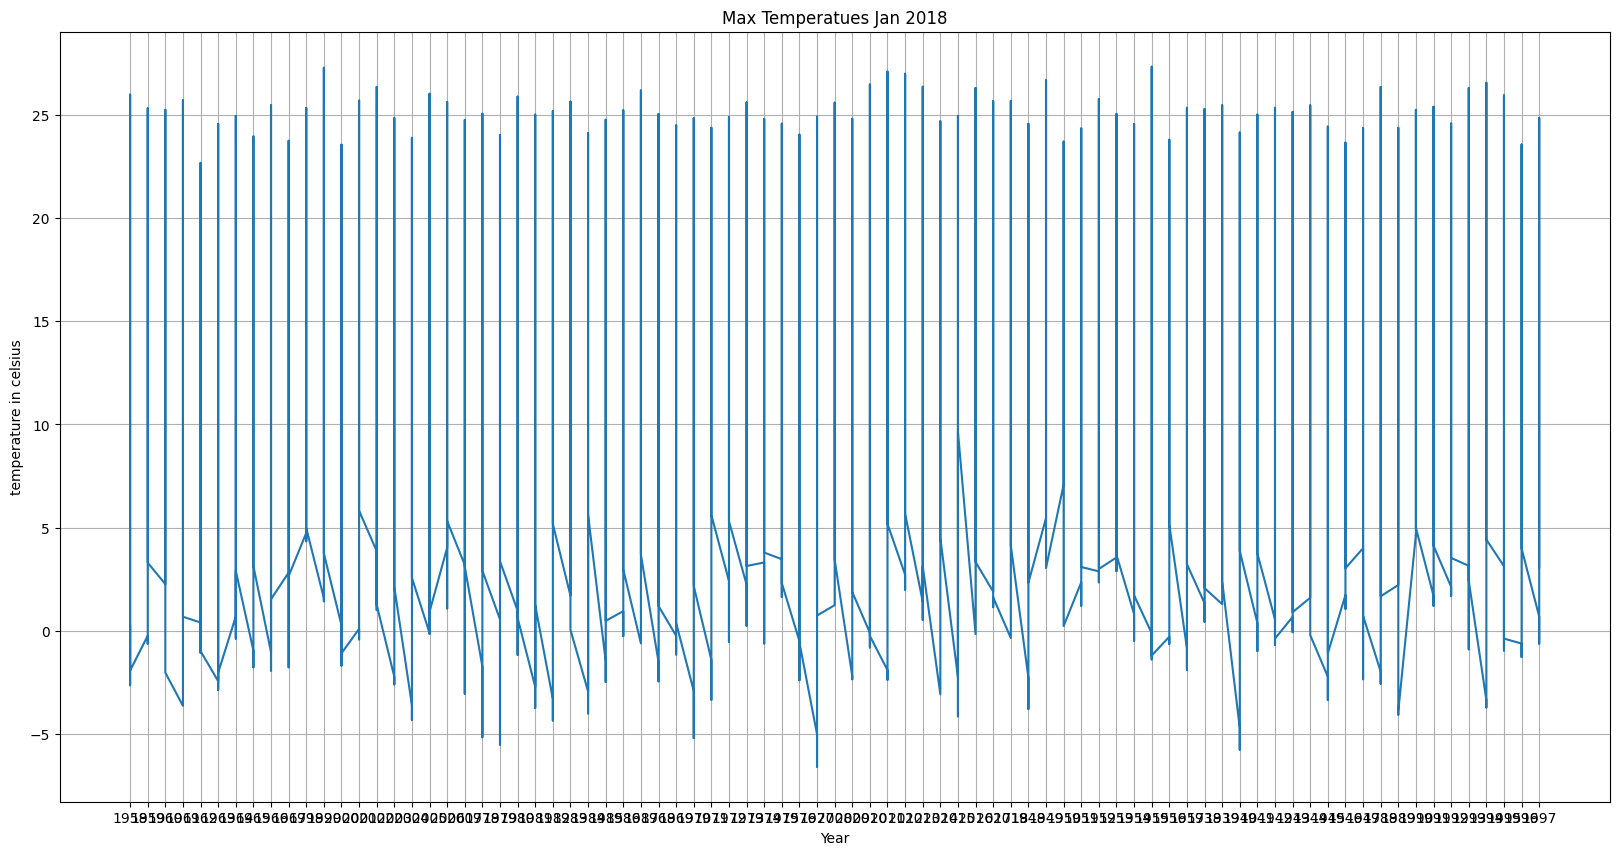

In [40]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

x = df['date'].str[0:4]
y = df['value']
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, y)
ax.grid()
ax.set(xlabel='Year', ylabel='temperature in celsius', title='Max Temperatues Jan 2018')